### <u> <font color =green> PROBLEM DESCRIPTION: 
<b> <font color =green> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### <u> <font color = green> GOAL
<font color = green> <b> Job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, predicting a 0 or 1 value for the variable.

### <u> <b> <font color = green> DATA DICTIONARY
<b> <font color = green> survival
0 = No,
1 = Yes
sex

Age: Age in years

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

Port of Embarkation

C = Cherbourg,
Q = Queenstown,
S = Southampton
pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower
sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the train test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#### DATA UNDERSTANDING

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Dimensions of the dataset
df_train.shape

(891, 12)

In [7]:
#Initial statistics of the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Info from the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color = green> We could see that there are many object/categorical features in our dataset. Also with the dimension we saw, there are 891 records or passenger details. For features such as Age,Cabin and Embarked there are some missing values. We can take it forward and analyse the missing values.

#### CLEANING THE DATASET

In [9]:
#Null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Percentage of Null values
round(100*(df_train.isnull().sum()/len(df_train.index)))

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

<font color = green>We could see 20% of the records doesn't have `Age` provided and 77% of the records doesn't have `Cabin` mentioned. While there are just for 2 records, `Cabin` is missing. So we start with the `Cabin` column. We can analyse for each of these feature and take a decision whether to impute or drop the records. 

<font color = green> We know that 77% of missing values is very high amount, and hence very less information it will be providing. But we know that `Cabin` is a highly important column in our analysis, since the survivors would have been mainly dependant on their position in the Ship. Similarly `Age` is also an important column. Hence we won't be dropping any of the columns, instead go on imputing with necessary values.

In [11]:
#Assessing the number of entries
from collections import Counter      
Counter(df_train['Cabin'])

Counter({nan: 687,
         'C85': 1,
         'C123': 2,
         'E46': 1,
         'G6': 4,
         'C103': 1,
         'D56': 1,
         'A6': 1,
         'C23 C25 C27': 4,
         'B78': 1,
         'D33': 2,
         'B30': 1,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F33': 3,
         'F G73': 2,
         'E31': 1,
         'A5': 1,
         'D10 D12': 1,
         'D26': 2,
         'C110': 1,
         'B58 B60': 2,
         'E101': 3,
         'F E69': 1,
         'D47': 1,
         'B86': 1,
         'F2': 3,
         'C2': 2,
         'E33': 2,
         'B19': 1,
         'A7': 1,
         'C49': 1,
         'F4': 2,
         'A32': 1,
         'B4': 1,
         'B80': 1,
         'A31': 1,
         'D36': 2,
         'D15': 1,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'C87': 1,
         'B77': 2,
         'E67': 2,
         'B94': 1,
         'C125': 2,
         'C99': 1,
         'C118': 1,
         'D7': 1,
         'A19'

In [12]:
df_train['Cabin'].fillna('U',inplace=True)

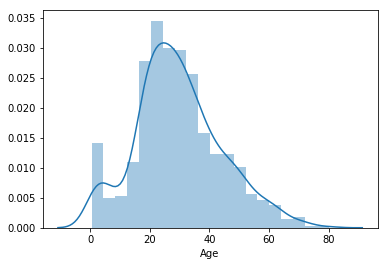

In [13]:
sns.distplot(df_train['Age'].dropna())

In [14]:
df_train['Age'].mean()

29.69911764705882

<font color = green>We can see the above distribution for the feature `Age` and find that the mean of the passengers is 29.7. Also most of the passengers in the Ship was aged 20-40. But again imputing here with mean or mode won't be a good idea, since we would be generalising over 20% of the passengers' Age. Hence we can introduce a new value -0.5 that can indicate as unknown, and later proceed with binning for the Age feature and convert proper bins to each level.

In [15]:
df_train['Age'].fillna(-0.5,inplace=True)

<font color = green>Now only `Embarked` column needs to checked for NULL values.

In [16]:
df_train.loc[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_train['Embarked'].mode()

0    S
dtype: object

<font color = green>Hence we can imput this two rows with S value for 'Embarked' column rather than dropping these 2 records.

In [20]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

<font color = green>We will see the dataset after cleaning.

In [21]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<font color = green>There are no more NULL values present. Hence we can proceed further with our analysis.

<font color = green>Now we can see whether there are any unwanted levels present in each of the feature that needs to be cleaned since those are as good as NULL values.

In [22]:
df_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [23]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [24]:
df_train.Age.unique()

array([22.  , 38.  , 26.  , 35.  , -0.5 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
df_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
df_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [27]:
df_train.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

<font color = green>We could see all values looks good. Hence we will proceed further.

#### OUTLIER ANALYSIS

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


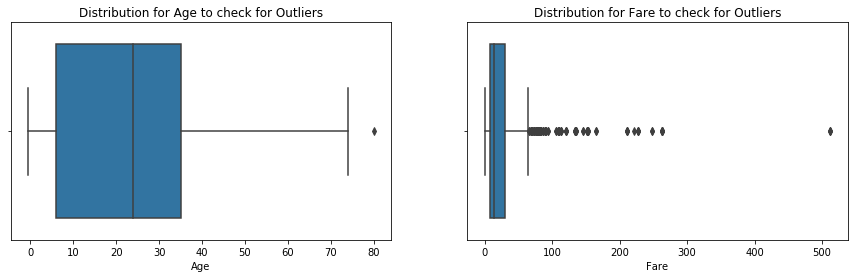

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Distribution for Age to check for Outliers')
sns.boxplot(df_train['Age'])
plt.subplot(1,2,2)
plt.title('Distribution for Fare to check for Outliers')
sns.boxplot(df_train['Fare'])
plt.show()

<font color = green>We can see there are not much of an outlier passengers who are aged. But there are passengers who bought high priced tickets to get into the Ship. Maybe we can go ahead and bin for both of the features later.

#### DATA PREPARATION AND EDA

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


<font color = green>We can see the `Name` is not that relavant feature. Hence we can go ahead and drop this column. Similarly we can drop for the column Ticket, which is not giving any important information.

In [31]:
df_train['Name_Honorifics'] = df_train['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [32]:
df_train.drop(['Name'],axis=1,inplace=True)

In [33]:
df_train.drop(['Ticket'],axis=1,inplace=True)

<font color = green>For the feature `Cabin`, the cabin position would be indicated mainly by the first character and not the number following it. Hence we can remove the numbers following the cabin indicator.

In [34]:
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: x[0])

<font color = green>As said earlier, we can do binning for the features `Age` and `Fare` for better approach and help in skewness problem.

In [35]:
df_train.Age.max()

80.0

In [36]:
#Binning the Age Feature
bins=[-1,0,5,12,18,25,60,100]
labels=["Unknown","Baby","Kid","Teenager","Student","Adult","Senior_Citizen"]
df_train["Age_Group"] = pd.cut(df_train['Age'],bins=bins,labels=labels)

In [37]:
df_train.drop(['Age'],axis=1,inplace=True)

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Name_Honorifics,Age_Group
0,1,0,3,male,1,0,7.2500,U,S,Mr,Student
1,2,1,1,female,1,0,71.2833,C,C,Mrs,Adult
2,3,1,3,female,0,0,7.9250,U,S,Miss,Adult
3,4,1,1,female,1,0,53.1000,C,S,Mrs,Adult
4,5,0,3,male,0,0,8.0500,U,S,Mr,Adult


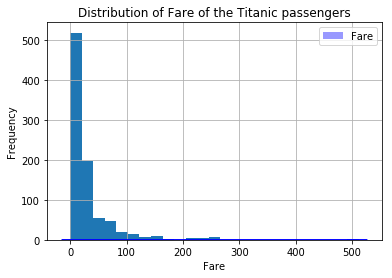

In [39]:
#Distribution of Feature Fare.
df_train.Fare.hist(bins=25)
plt.title("Distribution of Fare of the Titanic passengers")
plt.ylabel('Frequency')
g = sns.distplot(df_train['Fare'],color="b",label="Fare")
g = g.legend(loc="best")

<font color = green>To bin the feature Fare, we will see the 25%,50%,75% quantile values and assign bins appropriately.

In [40]:
#Statistics for the Fare feature
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
df_train['Fare'] = df_train['Fare'].fillna(-0.5)
bins=[-1,0,8,15,31,600]
labels=[0,1,2,3,4]
new_fare = pd.cut(df_train['Fare'],bins=bins,labels=labels)
df_train['Fare'] = new_fare

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Name_Honorifics,Age_Group
0,1,0,3,male,1,0,1,U,S,Mr,Student
1,2,1,1,female,1,0,4,C,C,Mrs,Adult
2,3,1,3,female,0,0,1,U,S,Miss,Adult
3,4,1,1,female,1,0,4,C,S,Mrs,Adult
4,5,0,3,male,0,0,2,U,S,Mr,Adult


In [43]:
df_train.Name_Honorifics.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<font color = green>We could find there are many Name Honorifics present that address people other than normal 'Mr, Mrs, Miss and Master. We can group them accordingly and then convert the feature into continuous one.

In [44]:
df_train["Name_Honorifics"] = df_train["Name_Honorifics"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train["Name_Honorifics"] = df_train["Name_Honorifics"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_train["Name_Honorifics"] = df_train["Name_Honorifics"].astype(int)

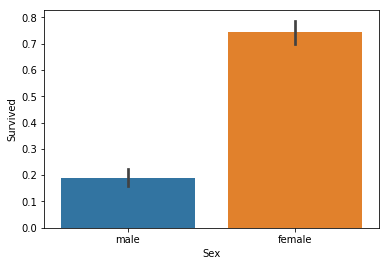

In [45]:
sns.barplot(x='Sex',y='Survived',data=df_train)

<font color = green>We can see that the major portion of the people who survived are female that too with a greater amount.

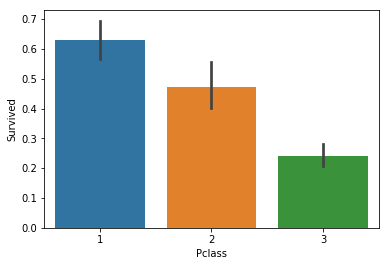

In [46]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

<font color = green>`PClass` feature indicates Ticket Class where 1 would be the highest and 3 being the lowest. We could find the most of the passengers with ticket class 1 are the most survivors while 2 being little less and 3 marking the least survivors.

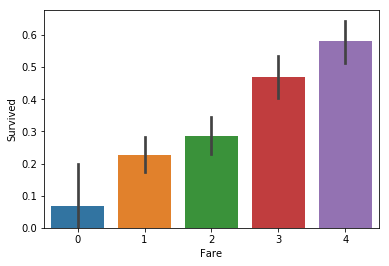

In [47]:
sns.barplot(x='Fare',y='Survived',data=df_train)

<font color = green>We could see the highest number of citiens are coming from the forth quantile of Fare charges. While converting into different quantiles, we know that the 4th is the highest fare bin. So this supports the base of our common intuition that the Survived people are mostly the high profile people or in other terms people who's fare is high,since they have got easy access to the life save boats.

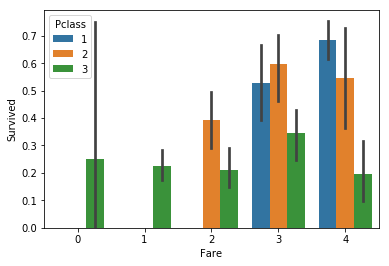

In [48]:
sns.barplot(x='Fare',y='Survived',hue='Pclass',data=df_train)

<font color = green>The above barplot comes self-explanatory with the help of previous plots of Fare and Pclass with Survived feature.

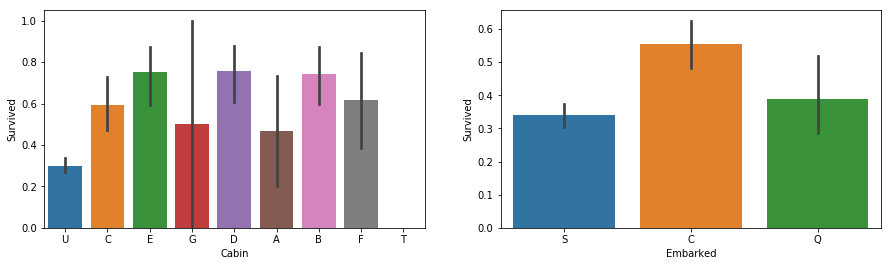

In [49]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Cabin',y='Survived',data=df_train)
plt.subplot(1,2,2)
sns.barplot(x='Embarked',y='Survived',data=df_train)
plt.show()

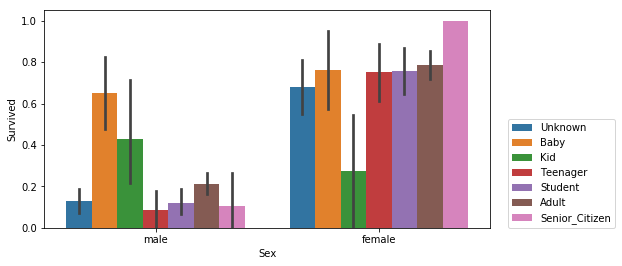

In [50]:
plt.figure(figsize=(8,4))
g = sns.barplot(x='Sex',y='Survived',hue='Age_Group',data=df_train)
plt.legend(loc=(1.04,0))
plt.show()

<font color = green>From the above graph, we can easily see and guess the largest number of survivors are from which division. We can see most of the survivors are Females or in other terms survival rate is more for Females and among females,' Senior Citizens' are the highest survivors followed by most of the other categories. Among females, Kids are having lowest survival chance. < br>
Similarly among male passengers, babies are having a high change of survival followed by kids while the lowest would be teenagers.
Overall, Male teenagers are having the lowest chance of survival.

<font color = green>Now we will go ahead and convert all the existing categorical features to continuous.

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Name_Honorifics,Age_Group
0,1,0,3,male,1,0,1,U,S,2,Student
1,2,1,1,female,1,0,4,C,C,1,Adult
2,3,1,3,female,0,0,1,U,S,1,Adult
3,4,1,1,female,1,0,4,C,S,1,Adult
4,5,0,3,male,0,0,2,U,S,2,Adult


In [52]:
df_train['Sex'] = df_train['Sex'].map({'male':0,'female':1})

In [53]:
df_train['Embarked'] = df_train['Embarked'].map({'S':0,'C':1,'Q':2})

In [54]:
df_train['Age_Group'].unique()

[Student, Adult, Unknown, Baby, Teenager, Kid, Senior_Citizen]
Categories (7, object): [Unknown < Baby < Kid < Teenager < Student < Adult < Senior_Citizen]

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Name_Honorifics,Age_Group
0,1,0,3,0,1,0,1,U,0,2,Student
1,2,1,1,1,1,0,4,C,1,1,Adult
2,3,1,3,1,0,0,1,U,0,1,Adult
3,4,1,1,1,1,0,4,C,0,1,Adult
4,5,0,3,0,0,0,2,U,0,2,Adult


In [56]:
df_train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [57]:
df_train = pd.get_dummies(df_train,columns = ['Cabin'],prefix=['Cabin'],drop_first=True)

In [58]:
df_train = pd.get_dummies(df_train,columns = ['Age_Group'],prefix=['Group'],drop_first=True)

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Name_Honorifics,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Group_Baby,Group_Kid,Group_Teenager,Group_Student,Group_Adult,Group_Senior_Citizen
0,1,0,3,0,1,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,1,1,1,1,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1,1,1,1,0,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,5,0,3,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<font color = green>So our final dataset is ready with many new features and all the values continuous. Now we can take it forward for model building.

<font color = green>We can view the correlation between all this values.

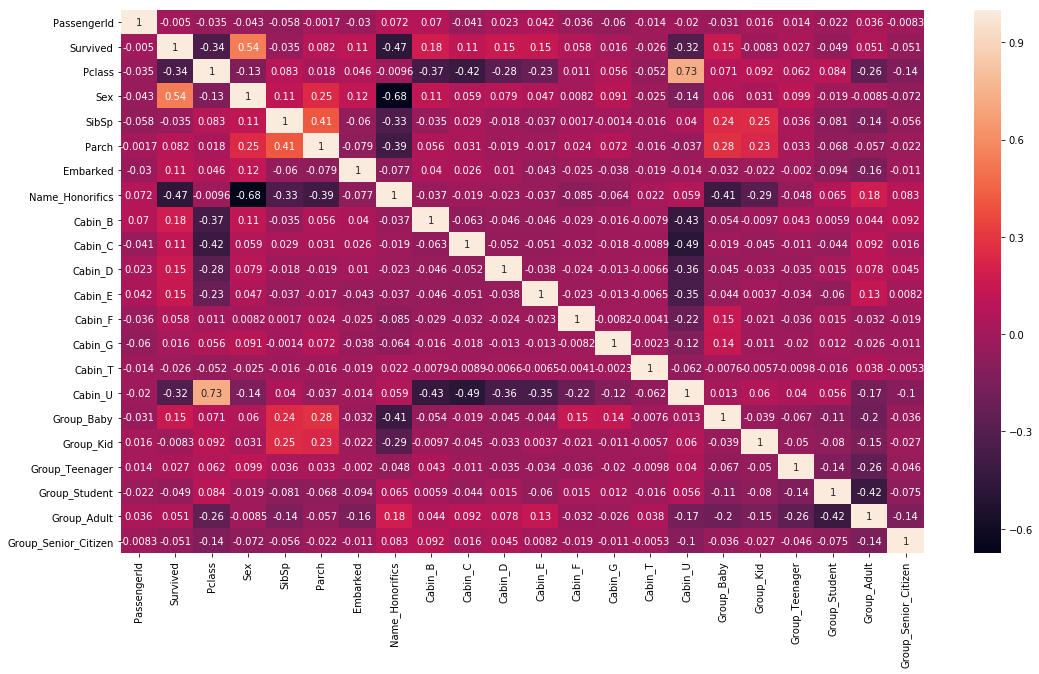

In [60]:
plt.figure(figsize=(18,10))
sns.heatmap(df_train.corr(),annot=True)

<font color = green>We can see a pretty high correlation between the features `PClass` and `Cabin U` of value 0.73. Also Survived and Sex is having a good correlation of 0.54. Name Honorifics and Sex are also highly negatively correlated which are also intuitive.

In [61]:
titanic = df_train.copy()

In [62]:
X = df_train.drop(['Survived'],axis=1)
y = df_train['Survived']

In [63]:
X.shape

(891, 22)

In [64]:
y.shape

(891,)

<font color = green>Here since all the features are in comparable range, no need of scaling.

#### MODEL BUILDING

<font color = green>We can use the RFE to find out the only relevant/important contributor features and drop the rest for model building.

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

<font color = green>We can RFE to select 12 features initially and view the model on those columns and go for forward/backward approach

In [66]:
rfe = RFE(logreg,12)
rfe = rfe.fit(X,y)

In [67]:
columns = X.columns[rfe.support_]
columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Name_Honorifics', 'Cabin_B',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Group_Baby',
       'Group_Senior_Citizen'],
      dtype='object')

In [68]:
X_train_RFE = X[columns]

In [69]:
X_train_bkup = X_train_RFE.copy()

In [70]:
X_train_RFE.head()

,Pclass,Sex,SibSp,Parch,Name_Honorifics,Cabin_B,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Group_Baby,Group_Senior_Citizen
0,3,0,1,0,2,0,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,0,0
2,3,1,0,0,1,0,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,0,0,0,0
4,3,0,0,0,2,0,0,0,0,0,0,0


In [71]:
#importing the statsmodel library
import statsmodels.api as sm

In [72]:
model1 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -366.96
Date:                Sat, 31 Aug 2019   Deviance:                       733.91
Time:                        16:58:00   Pearson chi2:                     913.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2259      0.618      5.221      0.000       2.015       4.437
Pclass                  -0.9546      0.134     -7.100      0.000      -1.218      -0.691
Sex                      1.8530      0.264      7.025      0.000       1.336       2.370
SibSp                   -0.4845      0.120     -4.045      0.000      -0.719      -0.250
Parch                   -0.2826      0.124     -2.283      0.022      -0.525      -0.040
Name_Honorifics         -1.3545      0.241     -5.614      0.000      -1.827      -0.882
Cabin_B                  0.8247      0.469      1.758      0.079      -0.095       1.744
Cabin_D                  1.0047      0.511      1.967      0.049       0.003       2.006
Cabin_E                  1.0402      0.501      2.075      0.038       0.058       2.023
Cabin_F                  0.6995      0.843      0.830      0.407      -0.953       2.352
Cabin_G                 -0.9077      1.102     -0.823      0.410      -3.068       1.253
Group_Baby               1.2936      0.483      2.677      0.007       0.346       2.241
Group_Senior_Citizen    -1.1470      0.646     -1.776      0.076      -2.413       0.119
========================================================================================
"""

<font color = green>When observing the p-values we can see that there are many insignificant features in our first model built with p-values more than 0.05 which marks them as insignificant. We can go for backward approach now by removing each of those features one by one, rebuilt and see for the model.

<font color = green>We can spot Cabin_G with high value of 0.410. We can go ahead and drop thie feature first.

In [73]:
X_train_RFE.drop(['Cabin_G'],axis=1,inplace=True)

In [74]:
model2 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -367.29
Date:                Sat, 31 Aug 2019   Deviance:                       734.59
Time:                        16:58:00   Pearson chi2:                     915.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2634      0.615      5.306      0.000       2.058       4.469
Pclass                  -0.9598      0.134     -7.151      0.000      -1.223      -0.697
Sex                      1.8292      0.261      6.996      0.000       1.317       2.342
SibSp                   -0.4773      0.119     -4.011      0.000      -0.711      -0.244
Parch                   -0.2883      0.124     -2.327      0.020      -0.531      -0.046
Name_Honorifics         -1.3679      0.240     -5.696      0.000      -1.839      -0.897
Cabin_B                  0.8233      0.469      1.756      0.079      -0.096       1.742
Cabin_D                  1.0028      0.511      1.964      0.049       0.002       2.003
Cabin_E                  1.0353      0.501      2.067      0.039       0.053       2.017
Cabin_F                  0.7140      0.841      0.849      0.396      -0.933       2.361
Group_Baby               1.2322      0.476      2.587      0.010       0.299       2.166
Group_Senior_Citizen    -1.1473      0.646     -1.777      0.076      -2.413       0.118
========================================================================================
"""

<font color = green>Next we will drop the feature `Cabin_F` with p-value of 0.396

In [75]:
X_train_RFE.drop(['Cabin_F'],axis=1,inplace=True)

In [76]:
model3 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -367.66
Date:                Sat, 31 Aug 2019   Deviance:                       735.32
Time:                        16:58:01   Pearson chi2:                     914.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2921      0.613      5.375      0.000       2.092       4.493
Pclass                  -0.9611      0.134     -7.165      0.000      -1.224      -0.698
Sex                      1.8233      0.261      6.994      0.000       1.312       2.334
SibSp                   -0.4825      0.119     -4.052      0.000      -0.716      -0.249
Parch                   -0.2880      0.124     -2.322      0.020      -0.531      -0.045
Name_Honorifics         -1.3762      0.239     -5.750      0.000      -1.845      -0.907
Cabin_B                  0.8151      0.469      1.739      0.082      -0.104       1.734
Cabin_D                  0.9943      0.510      1.948      0.051      -0.006       1.995
Cabin_E                  1.0256      0.501      2.047      0.041       0.044       2.007
Group_Baby               1.2653      0.474      2.668      0.008       0.336       2.195
Group_Senior_Citizen    -1.1540      0.645     -1.789      0.074      -2.419       0.111
========================================================================================
"""

<font color = green>Next we will drop the feature `Cabin_B` with p-value of 0.082 which is higher than 0.05 standard.

In [77]:
X_train_RFE.drop(['Cabin_B'],axis=1,inplace=True)

In [78]:
model4 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -369.21
Date:                Sat, 31 Aug 2019   Deviance:                       738.42
Time:                        16:58:01   Pearson chi2:                     924.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5165      0.596      5.897      0.000       2.348       4.685
Pclass                  -1.0464      0.125     -8.367      0.000      -1.292      -0.801
Sex                      1.8326      0.259      7.067      0.000       1.324       2.341
SibSp                   -0.4826      0.119     -4.059      0.000      -0.716      -0.250
Parch                   -0.2744      0.123     -2.231      0.026      -0.516      -0.033
Name_Honorifics         -1.3706      0.237     -5.773      0.000      -1.836      -0.905
Cabin_D                  0.8448      0.503      1.679      0.093      -0.141       1.831
Cabin_E                  0.8922      0.494      1.806      0.071      -0.076       1.861
Group_Baby               1.2515      0.475      2.636      0.008       0.321       2.182
Group_Senior_Citizen    -1.0906      0.634     -1.720      0.085      -2.333       0.152
========================================================================================
"""

<font color = green>We can continue this process now in dropping the features one by one seeing for theie significance indicated by p-values.

In [79]:
X_train_RFE.drop(['Cabin_D'],axis=1,inplace=True)

In [80]:
model5 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -370.67
Date:                Sat, 31 Aug 2019   Deviance:                       741.34
Time:                        16:58:01   Pearson chi2:                     929.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6646      0.590      6.215      0.000       2.509       4.820
Pclass                  -1.1007      0.121     -9.078      0.000      -1.338      -0.863
Sex                      1.8353      0.259      7.099      0.000       1.329       2.342
SibSp                   -0.4829      0.119     -4.060      0.000      -0.716      -0.250
Parch                   -0.2709      0.123     -2.206      0.027      -0.511      -0.030
Name_Honorifics         -1.3659      0.236     -5.786      0.000      -1.829      -0.903
Cabin_E                  0.8024      0.491      1.635      0.102      -0.159       1.764
Group_Baby               1.2460      0.476      2.620      0.009       0.314       2.178
Group_Senior_Citizen    -1.0640      0.620     -1.716      0.086      -2.279       0.151
========================================================================================
"""

In [81]:
X_train_RFE.drop(['Cabin_E'],axis=1,inplace=True)

In [82]:
model6 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -372.07
Date:                Sat, 31 Aug 2019   Deviance:                       744.15
Time:                        16:58:02   Pearson chi2:                     929.
No. Iterations:                     5   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8624      0.579      6.668      0.000       2.727       4.998
Pclass                  -1.1457      0.119     -9.655      0.000      -1.378      -0.913
Sex                      1.8082      0.257      7.030      0.000       1.304       2.312
SibSp                   -0.4873      0.119     -4.091      0.000      -0.721      -0.254
Parch                   -0.2767      0.123     -2.249      0.025      -0.518      -0.036
Name_Honorifics         -1.3967      0.235     -5.948      0.000      -1.857      -0.936
Group_Baby               1.2170      0.475      2.565      0.010       0.287       2.147
Group_Senior_Citizen    -1.0760      0.619     -1.738      0.082      -2.289       0.137
========================================================================================
"""

In [83]:
X_train_RFE.drop(['Group_Senior_Citizen'],axis=1,inplace=True)

In [84]:
model7 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -373.79
Date:                Sat, 31 Aug 2019   Deviance:                       747.58
Time:                        16:58:02   Pearson chi2:                     931.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7430      0.572      6.541      0.000       2.621       4.865
Pclass             -1.1147      0.117     -9.531      0.000      -1.344      -0.885
Sex                 1.8282      0.256      7.133      0.000       1.326       2.331
SibSp              -0.4766      0.118     -4.033      0.000      -0.708      -0.245
Parch              -0.2765      0.122     -2.268      0.023      -0.516      -0.038
Name_Honorifics    -1.3920      0.234     -5.948      0.000      -1.851      -0.933
Group_Baby          1.2161      0.473      2.572      0.010       0.289       2.143
===================================================================================
"""

<font color = green>Now all the features looks significant. Now we can go ahead and see for the `Variance Inflation Factor` for thes features and make a decision.

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,6.48
4,Name_Honorifics,5.01
3,Parch,1.61
1,Sex,1.57
2,SibSp,1.53
5,Group_Baby,1.25


<font color = green>We can see the VIF of Pclass to be in slightly higher side of 6.48 >5. Going with normal standard of 5, we can drop this feature and built our final model.

In [87]:
X_train_RFE.drop(['Pclass'],axis=1,inplace=True)

In [88]:
model8 = sm.GLM(y,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
result = model8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -426.09
Date:                Sat, 31 Aug 2019   Deviance:                       852.18
Time:                        16:58:02   Pearson chi2:                     941.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6716      0.451      1.489      0.136      -0.212       1.556
Sex                 1.9641      0.247      7.961      0.000       1.481       2.448
SibSp              -0.4845      0.108     -4.501      0.000      -0.695      -0.274
Parch              -0.2614      0.116     -2.252      0.024      -0.489      -0.034
Name_Honorifics    -1.0604      0.226     -4.701      0.000      -1.502      -0.618
Group_Baby          1.1027      0.466      2.366      0.018       0.189       2.016
===================================================================================
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Parch,1.61
1,SibSp,1.48
0,Sex,1.35
3,Name_Honorifics,1.20
4,Group_Baby,1.17


<font color = green>We could see an interesting observation here. The VIF of Pclass and Name_Honorifics were very high when oberserved the values before dropping the feature `Pclass`. After dropping, the VIF of Name_Honorifics has gone done indicating both these features where correlated to an extend and was giving out the same information to an extend.

<font color = red> <b> So our final features are Parch, SibSp, Sex, Name_Honorifics, Group_Baby

In [90]:
y_train_pred = result.predict(sm.add_constant(X_train_RFE)).values.reshape(-1)

In [91]:
#Observing the first 10 prediction probabilities
y_train_pred[:10]

array([0.12635366, 0.74855225, 0.82855534, 0.74855225, 0.19014419,
       0.19014419, 0.19014419, 0.5148607 , 0.74129109, 0.74855225])

In [92]:
#Voewing the final dataset which we had before mdoelling with all the features
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Name_Honorifics,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Group_Baby,Group_Kid,Group_Teenager,Group_Student,Group_Adult,Group_Senior_Citizen
0,1,0,3,0,1,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,1,1,1,1,0,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1,1,1,1,0,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,5,0,3,0,0,0,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [93]:
titanic_df = titanic[['PassengerId','Survived']]

In [94]:
titanic_df['Survived_Predicted'] = y_train_pred

In [95]:
titanic_df.head()

,PassengerId,Survived,Survived_Predicted
0,1,0,0.126354
1,2,1,0.748552
2,3,1,0.828555
3,4,1,0.748552
4,5,0,0.190144


#### FIND THE OPTIMAL CUT OFF POINT

In [96]:
# Let's create columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    titanic_df[i] = titanic_df['Survived_Predicted'].map(lambda x: 1 if x > i else 0)
titanic_df.head()

,PassengerId,Survived,Survived_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.126354,1,1,0,0,0,0,0,0,0,0
1,2,1,0.748552,1,1,1,1,1,1,1,1,0,0
2,3,1,0.828555,1,1,1,1,1,1,1,1,1,0
3,4,1,0.748552,1,1,1,1,1,1,1,1,0,0
4,5,0,0.190144,1,1,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(titanic_df.Survived,titanic_df[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1] / (cm1[1,0]+cm1[1,1])
    speci = cm1[0,0] / (cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.383838,1.000000,0.000000
0.1,0.1,0.428732,0.979532,0.085610
0.2,0.2,0.804714,0.748538,0.839709
0.3,0.3,0.810325,0.742690,0.852459
0.4,0.4,0.813692,0.733918,0.863388
0.5,0.5,0.811448,0.707602,0.876138
0.6,0.6,0.810325,0.681287,0.890710
0.7,0.7,0.790123,0.596491,0.910747
0.8,0.8,0.709315,0.327485,0.947177
0.9,0.9,0.618406,0.008772,0.998179


<font color = green>Observing the various parameters for the different probability points,we can see highest accuracy we are getting for the points 0.2,0.3,0.4,0.5 or 0.6 but sensitivity and specificity varies for these values. Hence there is a need to select the optimal point.

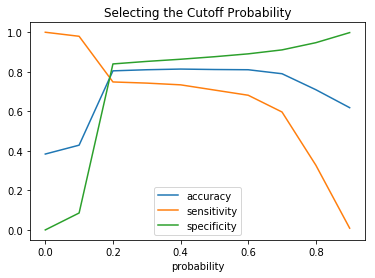

In [98]:
cutoff_df.plot.line(x='probability',y=['accuracy','sensitivity','specificity'])
plt.title('Selecting the Cutoff Probability')
plt.show()

<font color = green>From the above graph we can select the cut-off probability as 0.2.

In [99]:
titanic_df['Predicted'] = titanic_df['Survived_Predicted'].map(lambda x : 1 if x > 0.4 else 0 )

In [100]:
titanic_df.head()

,PassengerId,Survived,Survived_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,1,0,0.126354,1,1,0,0,0,0,0,0,0,0,0
1,2,1,0.748552,1,1,1,1,1,1,1,1,0,0,1
2,3,1,0.828555,1,1,1,1,1,1,1,1,1,0,1
3,4,1,0.748552,1,1,1,1,1,1,1,1,0,0,1
4,5,0,0.190144,1,1,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn import metrics

In [102]:
# Let's check the overall accuracy.
print(round(100* metrics.accuracy_score(titanic_df.Survived, titanic_df.Predicted),2))

80.47


In [103]:
confusion = confusion_matrix(titanic_df['Survived'],titanic_df['Predicted'])
print(confusion)

[[461  88]
 [ 86 256]]


In [104]:
# Predicted     not_survived    survived
# Actual
# not_survived        461          88
# survived             86         256

#### MODEL METRICS

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
#Sensitivity
round(100*(TP / float(TP+FN)),2)

74.85

In [107]:
#Specificity
round(100*(TN / float(TN+FP)),2)

83.97

In [108]:
#False Positive Rate
round(100*(FP / float(FP+TN)),2)

16.03

In [109]:
#Positive Predictive Value
round(100*(TP / float(TP+FP)),2)

74.42

In [110]:
#Negative Predictive Value
round(100*(TN / float(TN+FN)),2)

84.28

#### ROC CURVE

In [111]:
from sklearn import metrics

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(titanic_df.Survived, titanic_df.Predicted, drop_intermediate = False )

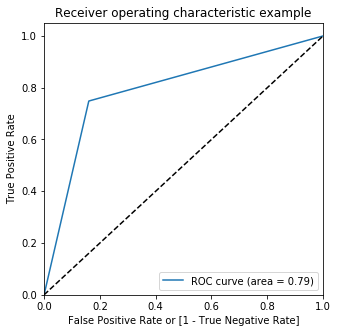

In [114]:
draw_roc(titanic_df.Survived, titanic_df.Predicted)

<font color = green> ROC or Reciever Operating Characteristic Curve is a plot that shows the diagnostic ability of binary classifiers. We know that the classifiers that give curves closer to top-left corner indicate a better performance. Also for good models, the AUC or Area Under Curve would be higher. In our ROC plot above, we can see we are getting not so bad AUC and trade off between the Sensitivity and Specificity.

#### PRECISION AND RECALL

In [115]:
precision = TP / float(TP+FP)

In [116]:
recall = TP / float(TP+FN)

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
precision_score(titanic_df.Survived, titanic_df.Predicted)

0.7441860465116279

In [119]:
recall_score(titanic_df.Survived, titanic_df.Predicted)

0.7485380116959064

In [120]:
from sklearn.metrics import precision_recall_curve

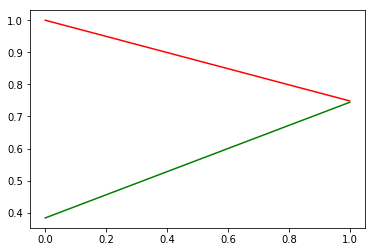

In [121]:
p, r, thresholds = precision_recall_curve(titanic_df.Survived, titanic_df.Predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### TEST DATASET

In [122]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
df_test.shape

(418, 11)

<font color = green>We need to keep the test dataset ready to run our previous model which we built and predict the passengers here in test dataset whether they survived or not. For this we can run the same transformations and set of operations that ran in train.

In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [125]:
df_test['Cabin'].fillna('U',inplace=True)

In [126]:
df_test['Age'].fillna(-0.5,inplace=True)

In [127]:
df_test.Fare = df_test.Fare.fillna(-0.5)

In [128]:
df_test['Name_Honorifics'] = df_test['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [129]:
df_test.drop(['Name'],axis=1,inplace=True)

In [130]:
df_test.drop(['Ticket'],axis=1,inplace=True)

In [131]:
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: x[0])

In [132]:
#Binning the Age Feature
bins=[-1,0,5,12,18,25,60,100]
labels=["Unknown","Baby","Kid","Teenager","Student","Adult","Senior_Citizen"]
df_test["Age_Group"] = pd.cut(df_test['Age'],bins=bins,labels=labels)

In [133]:
df_test.drop(['Age'],axis=1,inplace=True)

In [134]:
bins=[-1,0,8,15,31,600]
labels=[0,1,2,3,4]
new_fare = pd.cut(df_test['Fare'],bins=bins,labels=labels)
df_test['Fare'] = new_fare

In [135]:
df_test["Name_Honorifics"] = df_test["Name_Honorifics"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test["Name_Honorifics"] = df_test["Name_Honorifics"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_test["Name_Honorifics"] = df_test["Name_Honorifics"].astype(int)

In [136]:
df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})

In [137]:
df_test['Embarked'] = df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [138]:
df_test.Cabin.unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [139]:
df_test.Age_Group.unique()

[Adult, Senior_Citizen, Student, Teenager, Unknown, Kid, Baby]
Categories (7, object): [Unknown < Baby < Kid < Teenager < Student < Adult < Senior_Citizen]

In [140]:
df_test = pd.get_dummies(df_test,columns = ['Cabin'],prefix=['Cabin'],drop_first=True)

In [141]:
df_test = pd.get_dummies(df_test,columns = ['Age_Group'],prefix=['Group'],drop_first=True)

In [142]:
df_test.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Name_Honorifics,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Group_Baby,Group_Kid,Group_Teenager,Group_Student,Group_Adult,Group_Senior_Citizen
0,892,3,0,0,0,1,2,2,0,0,0,0,0,0,1,0,0,0,0,1,0
1,893,3,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,894,2,0,0,0,2,2,2,0,0,0,0,0,0,1,0,0,0,0,0,1
3,895,3,0,0,0,2,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,896,3,1,1,1,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
5,897,3,0,0,0,2,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0
6,898,3,1,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7,899,2,0,1,1,3,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0
8,900,3,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
9,901,3,0,2,0,3,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0


<font color = green>Now basically we have done all the transformations in test as same as what we have done in train dataset including the imputing of missing values with new level,Binning the values,dummy variables for some features,maping for binary level features etc.

<font color = green>Now we can select only those selected columns with which we build the model and apply the model on the test dataset.

In [143]:
final_features=[]
final_features_index = X_train_RFE.columns
for i in final_features_index:
    final_features.append(i)

In [144]:
final_features

['Sex', 'SibSp', 'Parch', 'Name_Honorifics', 'Group_Baby']

In [145]:
titanic_test = df_test[final_features]
titanic_final = df_test['PassengerId']

In [146]:
titanic_test.head()

,Sex,SibSp,Parch,Name_Honorifics,Group_Baby
0,0,0,0,2,0
1,1,1,0,1,0
2,0,0,0,2,0
3,0,0,0,2,0
4,1,1,1,1,0


In [147]:
y_test_pred = result.predict(sm.add_constant(titanic_test)).values.reshape(-1)

In [148]:
y_test_pred[:10]

array([0.19014419, 0.74855225, 0.19014419, 0.19014419, 0.69625748,
       0.19014419, 0.82855534, 0.10020422, 0.82855534, 0.08180224])

In [149]:
titanic_final = pd.DataFrame(titanic_final)
titanic_final['Survived_Prob'] = y_test_pred

In [150]:
#We can use the same cut-off probability of 0.2 to predict whether the passenger survived or not.
titanic_final['Survived'] = titanic_final['Survived_Prob'].map(lambda x : 1 if x > 0.5 else 0 )

In [151]:
titanic_final.drop(['Survived_Prob'],axis=1,inplace=True)

In [152]:
titanic_final.sort_values(by=['PassengerId'],ascending=True,inplace=True)

In [153]:
#Final dataset with just passenger ID which is ordered ascending and the Survived or not prediction represented by Binar value 0,1
titanic_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [154]:
titanic_final.shape

(418, 2)

<font color = green> The final dataset here contains 418 records or details of passenger IDs and whether the passenger survived or not.

In [155]:
#Exporting the final dataset as CSV file 
titanic_final.to_csv('Titanic_predictions4.csv',header=True,index=False)